In [1]:
#import librararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/Mall_Customers.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/NOOMAN KHAN/Downloads/Mall_Customers.csv'

In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
df1 = df.copy()

In [7]:
df = pd.get_dummies(data = df,columns = ['Gender'] , drop_first = True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [8]:
df.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [9]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)

In [10]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 3 , random_state = 42)
kmean.fit(df)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [11]:
Label = kmean.labels_

In [12]:
Label

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [13]:
df1["Cluster"] = Label

In [14]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [15]:
# df1 = pd.get_dummies(data = df1,columns = ['Gender'] , drop_first = True)
# df1.head()

In [16]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# df1 = sc.fit_transform(df1)

array([[ 1.02408784, -0.24490383,  0.96005657,  0.08104001,  0.09569148],
       [-0.91571936, -0.91464757, -0.88052186,  0.29940277, -0.17954301],
       [-0.47192101,  1.13852727, -0.42245682, -0.37379617,  0.04093069]])

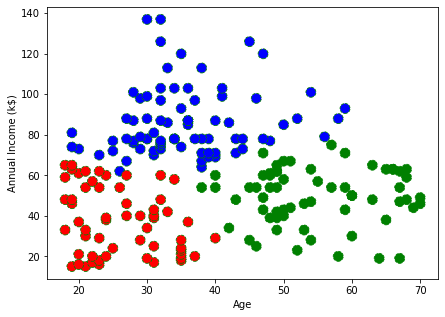

In [17]:
plt.figure(figsize = (7,5))
sns.scatterplot(x =df1[df1["Cluster"]==0]["Age"] , y =df1[df1["Cluster"]==0]["Annual Income (k$)"],
               color = "blue", s=100, edgecolor='green',linestyle='--')
sns.scatterplot(x =df1[df1["Cluster"]==1]["Age"] , y =df1[df1["Cluster"]==1]["Annual Income (k$)"],
               color = "red", s=100, edgecolor='green',linestyle='--')
sns.scatterplot(x =df1[df1["Cluster"]==2]["Age"] , y =df1[df1["Cluster"]==2]["Annual Income (k$)"],
               color = "green", s=100, edgecolor='green',linestyle='--')
centers = kmean.cluster_centers_
centers


In [18]:
centers = kmean.cluster_centers_
centers

array([[ 1.02408784, -0.24490383,  0.96005657,  0.08104001,  0.09569148],
       [-0.91571936, -0.91464757, -0.88052186,  0.29940277, -0.17954301],
       [-0.47192101,  1.13852727, -0.42245682, -0.37379617,  0.04093069]])

In [19]:
kmean.inertia_

573.8386868500048

In [20]:
inertia = []
for i in range(1,11):
    kmean = KMeans(n_clusters = i)
    kmean.fit(df)
    inertia.append(kmean.inertia_)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have

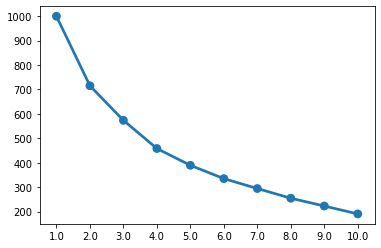

In [21]:
sns.pointplot(x = np.linspace(1,10,10) , y = inertia)
plt.show()

In [22]:
from sklearn import metrics
SC = []
for i in range(2,11):
    kmean = KMeans(n_clusters = i)
    kmean.fit(df)
    Labels = kmean.labels_
    SC.append(metrics.silhouette_score(df,Labels))
len(SC)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have

9

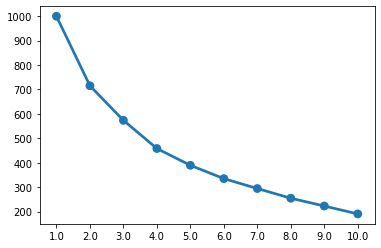

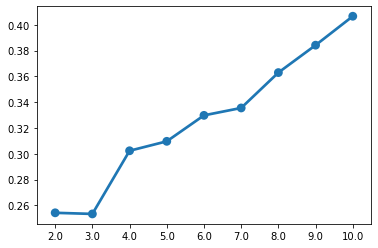

In [23]:
sns.pointplot(x = np.linspace(1,10,10) , y = inertia)
plt.show()
sns.pointplot(x = np.linspace(2,10,9) , y = SC)
plt.show()

In [24]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 4 , random_state = 42)
kmean.fit(df)

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [25]:
Label = kmean.labels_

In [26]:
Label

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [27]:
df2 = df1.drop("Cluster" , axis = 1).copy()

In [28]:
df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
df2["Cluster"] = Label

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

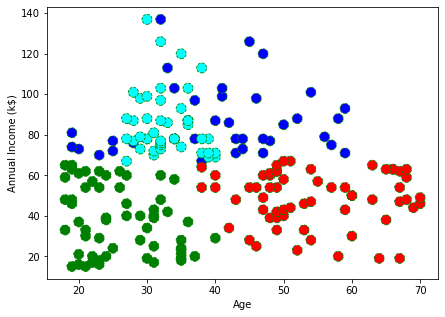

In [30]:
plt.figure(figsize = (7,5))
sns.scatterplot(x =df2[df2["Cluster"]==0]["Age"] , y =df2[df2["Cluster"]==0]["Annual Income (k$)"],
               color = "blue", s=100, edgecolor='green',linestyle='--')
sns.scatterplot(x =df2[df2["Cluster"]==1]["Age"] , y =df2[df2["Cluster"]==1]["Annual Income (k$)"],
               color = "red", s=100, edgecolor='green',linestyle='--')
sns.scatterplot(x =df2[df2["Cluster"]==2]["Age"] , y =df2[df2["Cluster"]==2]["Annual Income (k$)"],
               color = "green", s=100, edgecolor='green',linestyle='--')
sns.scatterplot(x =df2[df2["Cluster"]==3]["Age"] , y =df2[df2["Cluster"]==3]["Annual Income (k$)"],
               color = "cyan", s=100, edgecolor='green',linestyle='--')
 
 


 

In [31]:
X = df1.iloc[:,3:5]

In [32]:
from sklearn.cluster import AgglomerativeClustering

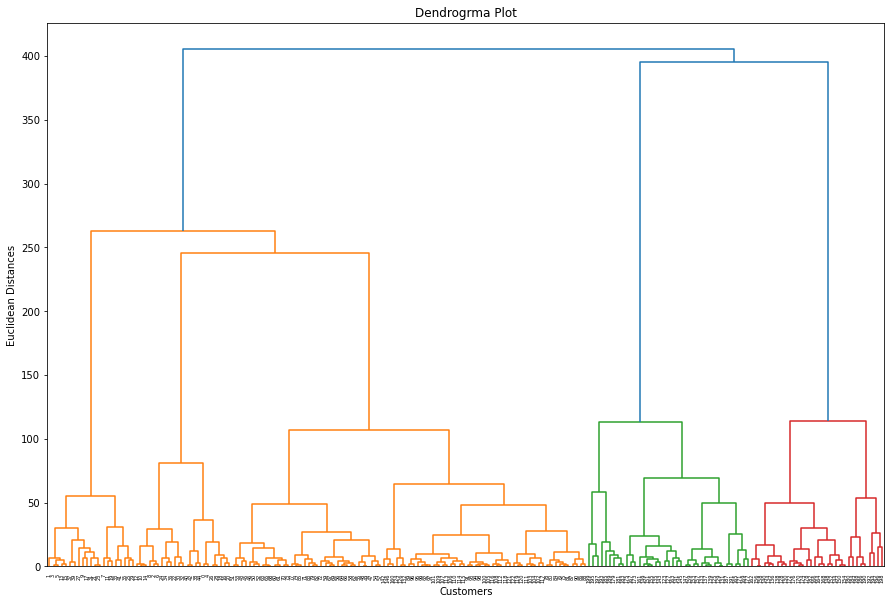

In [33]:
import scipy.cluster.hierarchy as shc  
plt.figure(figsize = (15,10))
dendro = shc.dendrogram(shc.linkage(X, method="ward")) 
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show() 

In [34]:
from sklearn.cluster import AgglomerativeClustering
HC =  AgglomerativeClustering(n_clusters = 5)
HC.fit(df)

AgglomerativeClustering(n_clusters=5)

From Dendogram optimum number of cluster can find is 5

In [35]:
Label = HC.labels_

In [40]:
Label

array([0, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4, 0, 2, 0, 0, 0, 2, 0, 4, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 4, 2, 4, 2, 4, 0, 4, 4, 0, 2, 2, 4, 0,
       2, 2, 0, 0, 4, 2, 2, 2, 4, 0, 2, 4, 0, 2, 4, 4, 4, 2, 0, 4, 2, 0,
       0, 2, 2, 0, 4, 2, 0, 0, 2, 0, 4, 0, 0, 2, 4, 0, 4, 0, 2, 4, 4, 4,
       4, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

In [36]:
df2["Cluster_2"] = Label

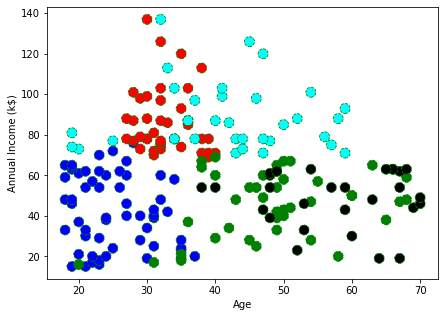

In [37]:
plt.figure(figsize = (7,5))
sns.scatterplot(x =df2[df2["Cluster_2"]==0]["Age"] , y =df2[df2["Cluster_2"]==0]["Annual Income (k$)"],
               color = "blue", s=100, edgecolor='green',linestyle='--')
sns.scatterplot(x =df2[df2["Cluster_2"]==1]["Age"] , y =df2[df2["Cluster_2"]==1]["Annual Income (k$)"],
               color = "red", s=100, edgecolor='green',linestyle='--')
sns.scatterplot(x =df2[df2["Cluster_2"]==2]["Age"] , y =df2[df2["Cluster_2"]==2]["Annual Income (k$)"],
               color = "green", s=100, edgecolor='green',linestyle='--')
sns.scatterplot(x =df2[df2["Cluster_2"]==3]["Age"] , y =df2[df2["Cluster_2"]==3]["Annual Income (k$)"],
               color = "cyan", s=100, edgecolor='green',linestyle='--')
sns.scatterplot(x =df2[df2["Cluster_2"]==4]["Age"] , y =df2[df2["Cluster_2"]==4]["Annual Income (k$)"],
               color = "black", s=100, edgecolor='green',linestyle='--')
plt.show()

In [38]:
from sklearn import metrics

In [39]:
metrics.silhouette_score(df,Label)

0.30454552617046354